In [22]:
import numpy as np

transition_probs = {
  's0':{
    'a0': {'s0': 0.5, 's2': 0.5},
    'a1': {'s2': 1}
  },
  's1':{
    'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
    'a1': {'s1': 0.95, 's2': 0.05}
  },
  's2':{
    'a0': {'s0': 0.4, 's1': 0.6},
    'a1': {'s0': 0.3, 's1': 0.3, 's2':0.4}
  }
}

rewards = {
  's1': {'a0': {'s0': +5}},
  's2': {'a1': {'s0': -1}}
}

from mdp import MDP
mdp = MDP(transition_probs, rewards, initial_state='s0')

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Markov_Decision_Process.svg/800px-Markov_Decision_Process.svg.png' width=300px>

In [4]:
print('inital state =', mdp.reset())
next_state,reward,done,info = mdp.step('a1')
print('next_state = %s, reward=%s,done=%s'%(next_state,reward,done))

inital state = s0
next_state = s2, reward=0.0,done=False


In [5]:
print('mdp.get_all_states =',mdp.get_all_states())
print('mdp.get_possible_actions("s1") =',mdp.get_possible_actions('s1'))
print('mdp.get_next_states("s1","a0") =',mdp.get_next_states('s1','a0'))
print('mdp.get_transition_prob("s1","a0","s0") =', mdp.get_transition_prob('s1','a0','s0'))

mdp.get_all_states = ('s0', 's1', 's2')
mdp.get_possible_actions("s1") = ('a0', 'a1')
mdp.get_next_states("s1","a0") = {'s0': 0.7, 's1': 0.1, 's2': 0.2}
mdp.get_transition_prob("s1","a0","s0") = 0.7


In [6]:
def get_action_value(mdp,state_values,state,action,gamma):
    
    Q = 0
    next_states = mdp.get_next_states(state,action)
   
    for next_state in next_states:
        probability = next_states[next_state]
        reward = mdp.get_reward(state,action,next_state)
        Q += probability*(reward + gamma*state_values[next_state])
   
    return Q

In [7]:
def get_new_state_value(mdp, state_values, state, gamma):
    if mdp.is_terminal(state): return 0
    
    actions = mdp.get_possible_actions(state)
    
    state_value = 0
    for action in actions:
        action_value = get_action_value(mdp, state_values, state, action, gamma)
        if action_value > state_value:
            state_value = action_value
    
    return  state_value

In [8]:
gamma = 0.9
num_iter = 100
min_difference = 0.001

state_values = {s : 0 for s in mdp.get_all_states()}

new_state_values = {}
for i in range(num_iter):
    for s in state_values:
        new_state_values[s] = get_new_state_value(mdp,state_values,s,gamma)
    assert isinstance(new_state_values,dict)
    diffs = [abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states()]
    diff = max(abs(new_state_values[s]-state_values[s]) for s in mdp.get_all_states())
    print('iter %4i | diff:%6.5f | '%(i,diff),end="")
    print('   '.join("V(%s) = %.3f"%(s, v) for s,v in state_values.items()), end='\n\n')
    state_values = dict(new_state_values)
    if diff < min_difference:
        print('Terminated'); break

iter    0 | diff:3.50000 | V(s0) = 0.000   V(s1) = 0.000   V(s2) = 0.000

iter    1 | diff:1.89000 | V(s0) = 0.000   V(s1) = 3.500   V(s2) = 0.000

iter    2 | diff:1.70100 | V(s0) = 0.000   V(s1) = 3.815   V(s2) = 1.890

iter    3 | diff:1.13542 | V(s0) = 1.701   V(s1) = 4.184   V(s2) = 2.060

iter    4 | diff:0.73024 | V(s0) = 1.854   V(s1) = 5.319   V(s2) = 2.871

iter    5 | diff:0.61135 | V(s0) = 2.584   V(s1) = 5.664   V(s2) = 3.540

iter    6 | diff:0.54664 | V(s0) = 3.186   V(s1) = 6.275   V(s2) = 3.989

iter    7 | diff:0.49198 | V(s0) = 3.590   V(s1) = 6.790   V(s2) = 4.535

iter    8 | diff:0.42210 | V(s0) = 4.082   V(s1) = 7.189   V(s2) = 4.959

iter    9 | diff:0.36513 | V(s0) = 4.463   V(s1) = 7.611   V(s2) = 5.352

iter   10 | diff:0.32862 | V(s0) = 4.816   V(s1) = 7.960   V(s2) = 5.717

iter   11 | diff:0.29262 | V(s0) = 5.145   V(s1) = 8.280   V(s2) = 6.032

iter   12 | diff:0.26189 | V(s0) = 5.429   V(s1) = 8.572   V(s2) = 6.323

iter   13 | diff:0.23503 | V(s0) = 5.6

In [9]:
def get_optimal_action(mdp, state_values, state, gamma=0.9):
   
    if mdp.is_terminal(state): return None
     
    actions = mdp.get_possible_actions(state)
    
    optimal_action = None
    optimal_action_value = - float("inf")
    for action in actions:
        action_value = get_action_value(mdp, state_values, state, action, gamma)
        if action_value >= optimal_action_value:
            optimal_action_value = action_value
            optimal_action = action
    
    return optimal_action

In [10]:
optimal_action = get_optimal_action(mdp, state_values, 's1', gamma=0.9)

# Frozen lake 

In [24]:
from mdp import FrozenLakeEnv
mdp = FrozenLakeEnv(slip_chance = 0)
mdp.render()

*FFF
FHFH
FFFH
HFFG



In [25]:
def value_iteration(mdp,state_values=None,gamma=0.9,num_iter=1000,min_difference=1e-5):
    state_values = state_values or {s:0 for s in mdp.get_all_states()}
    new_state_values = {}
    for i in range(num_iter):
        for s in state_values:
            new_state_values[s] = get_new_state_value(mdp,state_values,s,gamma)
        assert isinstance(new_state_values,dict)
        
        diff = max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())
        print("iter %4i   |   diff: %6.5f   |   V(start): %.3f "%(i, diff, new_state_values[mdp._initial_state]))
        
        state_values = dict(new_state_values)
        if diff < min_difference:
            print('Terminated');break
            
    return state_values


In [26]:
state_values = value_iteration(mdp)

iter    0   |   diff: 1.00000   |   V(start): 0.000 
iter    1   |   diff: 0.90000   |   V(start): 0.000 
iter    2   |   diff: 0.81000   |   V(start): 0.000 
iter    3   |   diff: 0.72900   |   V(start): 0.000 
iter    4   |   diff: 0.65610   |   V(start): 0.000 
iter    5   |   diff: 0.59049   |   V(start): 0.590 
iter    6   |   diff: 0.00000   |   V(start): 0.590 
Terminated


In [27]:
state_values

{(0, 0): 0.5904900000000002,
 (0, 1): 0.6561000000000001,
 (0, 2): 0.7290000000000001,
 (0, 3): 0.6561000000000001,
 (1, 0): 0.6561000000000001,
 (1, 1): 0,
 (1, 2): 0.81,
 (1, 3): 0,
 (2, 0): 0.7290000000000001,
 (2, 1): 0.81,
 (2, 2): 0.9,
 (2, 3): 0,
 (3, 0): 0,
 (3, 1): 0.9,
 (3, 2): 1.0,
 (3, 3): 0}

In [28]:
s = mdp.reset()

In [29]:
mdp.render()
for t in range(100):
    a = get_optimal_action(mdp,state_values,s,gamma)
    print(a,end='\n\n')
    s,r,done,_=mdp.step(a)
    mdp.render()
    if done: break

*FFF
FHFH
FFFH
HFFG

right

S*FF
FHFH
FFFH
HFFG

right

SF*F
FHFH
FFFH
HFFG

down

SFFF
FH*H
FFFH
HFFG

down

SFFF
FHFH
FF*H
HFFG

down

SFFF
FHFH
FFFH
HF*G

right

SFFF
FHFH
FFFH
HFF*



In [30]:
import matplotlib.pyplot as plt
def draw_policy(mdp,state_values):
    plt.figure(figsize=(3,3))
    h,w = mdp.desc.shape
    states = sorted(mdp.get_all_states())
    V = np.array([state_values[s] for s in states])
    Pi = {s: get_optimal_action(mdp, state_values, s, gamma) for s in states}
    plt.imshow(V.reshape(w,h), cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    ax.set_xticks(np.arange(h)-.5)
    ax.set_yticks(np.arange(w)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {'left': (-1, 0), 'down':(0, -1), 'right':(1,0), 'up':(-1, 0)}
    for y in range(h):
        for x in range(w):
            plt.text(x, y, str(mdp.desc[y,x].item()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
            a = Pi[y, x]
            if a is None: continue
            u, v = a2uv[a]
            plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1) 
    plt.grid(color='b', lw=2, ls='-')
    plt.show()

after iteration 0
iter    0   |   diff: 1.00000   |   V(start): 0.000 


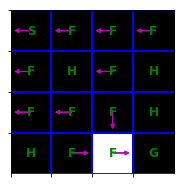

after iteration 1
iter    0   |   diff: 0.90000   |   V(start): 0.000 


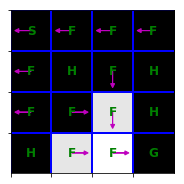

after iteration 2
iter    0   |   diff: 0.81000   |   V(start): 0.000 


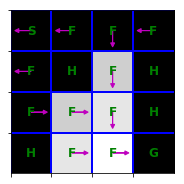

after iteration 3
iter    0   |   diff: 0.72900   |   V(start): 0.000 


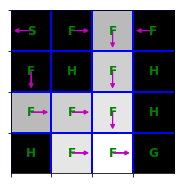

after iteration 4
iter    0   |   diff: 0.65610   |   V(start): 0.000 


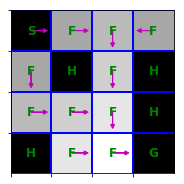

after iteration 5
iter    0   |   diff: 0.59049   |   V(start): 0.590 


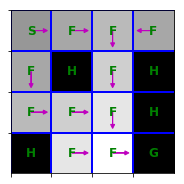

after iteration 6
iter    0   |   diff: 0.00000   |   V(start): 0.590 
Terminated


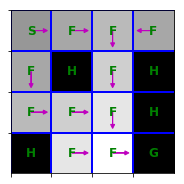

after iteration 7
iter    0   |   diff: 0.00000   |   V(start): 0.590 
Terminated


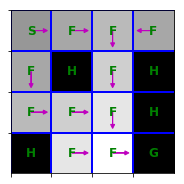

after iteration 8
iter    0   |   diff: 0.00000   |   V(start): 0.590 
Terminated


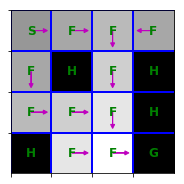

after iteration 9
iter    0   |   diff: 0.00000   |   V(start): 0.590 
Terminated


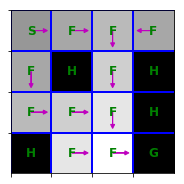

In [31]:
state_values = {s : 0 for s in mdp.get_all_states()}

for i in range(10):
    print("after iteration %i"%i)
    state_values = value_iteration(mdp, state_values, num_iter=1)
    draw_policy(mdp, state_values)